# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciando

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Carreguando dados

In [2]:
try:
    df=pd.read_csv('/datasets/vehicles_us.csv')
except:
    df=pd.read_csv('vehicles_us.csv')

### Explorando os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

In [3]:
#extraindo informações das colunas da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
#observando alguns dados
print(df.head(5))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


analisando algumas linhas e as informações da tabela conclui-se:
preço deve estar em dolar, já que é irreal para padrões brasileiros e o df está em ingles.  
todas as colunas estão em formato snack case.  
temos valores nulos em cor, odometro, cilindros e ano do modelo.   
traçao é para ser boleano.  
preço é inteiro. Por se tratar de um valor alto dispresaram os centavos.  


In [5]:
#com o describe é possivel analisar  como é a distribuição da coluna, pois nas colunas numericas é retornado o minimo o maximo, a mediana, os percentis 25 e 75, a media,  a moda.
print(df['model_year'].describe())
print()
print(df['price'].describe())
print()
print(df['odometer'].describe())
print()
print(df['date_posted'].describe())
print()
print(df['days_listed'].describe())
print()
print(df['paint_color'].describe())



count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

count          51525
unique           354
top       2019-03-17
freq             186
Name: date_posted, dtype: object

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

count     42258
unique       12
top     

In [6]:
#aqui se verifica se há colunas duplicadas com o metodo duplicated()
dfduplicated=df[df.duplicated()]
print(dfduplicated)

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


trata-se de um grafico feito provavelmente em 2019, talvez 2020.
vende-se carros de coleção, vende-se carros velhos, com quase 15 anos de uso.
existem carros com preços simbólicos. 
O odometro máximo chega proximo de 1 mi
temos carros recém chegados e o mais antigo sequer completou 1 ano.
precisamos transformar date_posted de objeto para datatime

### Conclusões e próximos passos
planejamento:
transformar date_posted de objeto para datatime
substituir os valores ausentes.
verificar se days listed = 0 corresponde a date_posted

## Cuidando dos valores ausentes (se houver algum)

In [7]:
#isnull procura valores ausentes e retorana um valor booleano
# is_4wd é uma coluna com valor 1 e 0, ou seja ficaria melhor como bolleano
#fillna() preencha os valores ausentes
print(df['is_4wd'].isnull().sum())
df['is_4wd']=df['is_4wd'].fillna(0)
df['is_4wd']=df['is_4wd'].astype(bool)
print(df['is_4wd'].unique())
print(df['is_4wd'].head(10))

25953
[ True False]
0     True
1     True
2    False
3    False
4    False
5     True
6    False
7     True
8     True
9     True
Name: is_4wd, dtype: bool


''' 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64 OK
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  '''

In [8]:

#alguns carros não possuem quilometragem outros não informaram a cor
df['paint_color']=df['paint_color'].fillna('indefinido')
odometronulo = df[df['odometer'].isnull()]

uma vez que não foi encontrada qualquer pista do porquê estar nulo, o odometro precisa ser preenchido com média ou mediana da coluna.  
Entretanto, não faz sentido preencher uma mesma média para todos os valores nulos.  
Usaremos as médias/medianas de acordo com o ano e estado do carro.
vamos solucionar os anos ausentes primeiro

usarei a media de cada modelo para preencher os faltantes.

In [9]:
dfmy=df[df['model_year'].isnull()]

median_by_model = df.groupby(['model'])['model_year'].agg(
    lambda x: pd.Series.mode(x)[0])
print(median_by_model)
def fill_median_by_model(row):
    if pd.isnull(row['model_year']):
# o .get funciona da seguinte maneira: ele procura uma chave e retorna seu valor, caso não encontrar retorna um valor padrão.
# Neste codigo, se o modelo não estiver presente em median_by_model, retorna o valor "seminfo". Caso contrário, retorna o valor original de model_year.
        return median_by_model.get(row['model'], "seminfo")
    return row['model_year']

df['model_year'] = df.apply(fill_median_by_model, axis=1)

#checando se ha algum modelo que não tenha nenhum exemplar com ano preenchido
print(df[df['model_year'] =="seminfo"])

model
acura tl             2005.0
bmw x5               2012.0
buick enclave        2012.0
cadillac escalade    2007.0
chevrolet camaro     2014.0
                      ...  
toyota sienna        2004.0
toyota tacoma        2015.0
toyota tundra        2007.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64
Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


In [10]:
#para melhor trabalhar com os anos, vamos separar em categorias:
def idade(data):
    ano= data['model_year']
    if ano <= 1988:
        return '30+ coleção'
    if ano <= 1999:
        return '20+ muito velho'
    if ano <= 2009:
        return '10+ velho'
    if ano <= 2014:
        return '05+ usado'
    if ano <= 2016:
        return '03+ semi-usado'
    if ano <= 2018:
        return '01+ semi-novo'
    if ano > 2018:
        return '00 novo'
    
df['idadec']= df.apply(idade, axis=1)
print(df['idadec'].isnull().sum())


0


In [11]:
#aqui tiramos todas as linhas com odometro nulo
dfdodo = df.dropna(subset=['odometer'])
#aqui pivotamos a tabela para retornar a mediana de kilometragem segundo os dois fatores: condição e idade
dfma=dfdodo.pivot_table(index='idadec', columns= 'condition' , values= 'odometer', aggfunc= 'median')
print(dfma)
#função que retorna a mediana do odometro segundo 2 fatores
def medianaodometro(condition, idadec):
    try:
        return dfma.loc[idadec, condition]
    except KeyError:
        return None

condition        excellent      fair      good  like new       new   salvage
idadec                                                                      
00 novo            14531.0       NaN   20168.5   12606.0     151.0    9621.0
01+ semi-novo      34847.0   73095.0   30339.0   29000.0     549.5   29328.0
03+ semi-usado     70042.0  163016.5   76581.5   57473.0   22000.0   46000.0
05+ usado         107000.0  149250.0  118000.0   92038.0   89759.0   94305.5
10+ velho         139000.0  182000.0  157510.0  123187.5  160650.0  177500.0
20+ muito velho   148031.0  200500.0  172000.0   98816.0  315000.0  197977.5
30+ coleção        58473.0  110000.0   75000.0   54000.0    1000.0   25050.0


Assim, aplica-se a função ao df para criar uma coluna nova, depois usa-se a coluna nova para preencher odometer nos indices que estão nulos,  
por fim checa-se se deu certo. 

In [12]:
df['odo_mediana']= df.apply(lambda x: medianaodometro(x['condition'],x['idadec']), axis=1)
df['odometer']=df['odometer'].fillna(df['odo_mediana'])
print(df['odometer'].isnull().sum())

0


In [13]:
print(df[df['odometer']<10]['odometer'].sum())

226.0


temos 226 carros '0km'

In [14]:
print(df['cylinders'].unique())
dfcy=df[df['cylinders'].isnull()]

[ 6.  4.  8. nan  5. 10.  3. 12.]


existem carros cujo modelo pode ter 6 ou 8 cilindros, mesmo assim acredito que se siga uma tendência, portanto para preencher valores vazios usarei a mediana de cada modelo de carro

In [15]:
#encontrando a moda por modelo:
cilindros = df.pivot_table(values='cylinders', index='model',   aggfunc=lambda x: x.mode().get(0))
print(cilindros) 

                   cylinders
model                       
acura tl                 6.0
bmw x5                   6.0
buick enclave            6.0
cadillac escalade        8.0
chevrolet camaro         6.0
...                      ...
toyota sienna            6.0
toyota tacoma            6.0
toyota tundra            8.0
volkswagen jetta         4.0
volkswagen passat        4.0

[100 rows x 1 columns]


In [16]:
#adicionando a coluna da moda ao df original
df = df.merge(cilindros, on='model', suffixes=('', '_mode_cylinders'))
#preenchendo os vazios
df['cylinders'].fillna(df['cylinders_mode_cylinders'].values[0], inplace=True)
df.drop(columns=['cylinders_mode_cylinders'], inplace=True)

In [17]:
df['cylinders'].value_counts()

cylinders
6.0     20960
8.0     15844
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: count, dtype: int64

resumo:
primeiro transformamos is_4wd para booliano, preenchendo as ausencias com 0(negativo)
depois substituimos as cores ausentes por idefinidas, após preenchemoso ano do carro com a moda do ano do carro de cada modelo.
após, separamos a idade dos carros de acordo com o ano de fabricação.
usamos essa coluna chamada idadec para preencher os valores faltantes de odometro
por fim, preenchemos os valores de cylinder(cilindors) com a moda por modelo de carro

## Corrindo os tipos de dados

In [18]:
df['model_year']=df['model_year'].astype(int)
df['cylinders']=df['cylinders'].astype(int)
df['date_posted']=pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
print(df['date_posted'])


0       2018-06-23
1       2019-04-09
2       2019-03-04
3       2018-08-11
4       2018-07-07
           ...    
51520   2018-12-09
51521   2018-06-30
51522   2019-02-27
51523   2019-03-01
51524   2018-10-01
Name: date_posted, Length: 51525, dtype: datetime64[ns]


agora transformamos cilindros para inteiro e date_posted para datatime

## Enriquecendo os dados

criando colunas de dia e mes

In [19]:
df['day']=df['date_posted'].dt.day
df['month']=df['date_posted'].dt.month
df['year']=df['date_posted'].dt.year
df['weekday']=df['date_posted'].dt.dayofweek
df.sample(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,idadec,odo_mediana,day,month,year,weekday
41240,3500,2004,honda odyssey,good,6,gas,195000.0,automatic,mini-van,silver,False,2018-12-24,74,10+ velho,157510.0,24,12,2018,0
39347,2800,2006,ford escape,excellent,6,gas,177000.0,automatic,SUV,indefinido,False,2019-03-17,13,10+ velho,139000.0,17,3,2019,6
9181,23700,2015,ram 1500,excellent,6,diesel,123831.0,automatic,truck,black,True,2018-09-05,23,03+ semi-usado,70042.0,5,9,2018,2
9830,16900,2014,ram 1500,good,6,gas,67859.0,automatic,truck,black,True,2018-09-13,44,05+ usado,118000.0,13,9,2018,3
18649,3700,2005,nissan altima,excellent,4,gas,95000.0,automatic,sedan,brown,False,2018-12-02,27,10+ velho,139000.0,2,12,2018,6
36772,2495,2005,ford taurus,good,6,gas,253800.0,automatic,sedan,green,False,2019-01-30,53,10+ velho,157510.0,30,1,2019,2
3587,7999,2014,chrysler 200,excellent,6,gas,107770.0,automatic,sedan,white,False,2019-01-09,84,05+ usado,107000.0,9,1,2019,2
18698,5500,2010,nissan altima,excellent,4,gas,145690.0,automatic,sedan,grey,False,2018-09-29,4,05+ usado,107000.0,29,9,2018,5
11661,2150,2006,hyundai elantra,fair,4,gas,159000.0,automatic,sedan,indefinido,False,2018-09-10,9,10+ velho,182000.0,10,9,2018,0
30185,33300,2016,chevrolet silverado 1500 crew,good,8,gas,14148.0,automatic,pickup,black,True,2018-06-29,14,03+ semi-usado,76581.5,29,6,2018,4


coluna idade do carro

In [20]:
df['car_age']= df['year'] - df['model_year']+1

coluna media de mks rodados por ano 

In [21]:
df['km/year']= (df['odometer']/df['car_age']).round(2)


In [22]:
dicionarioc={'excellent':3,    
'good':2,         
'like new':4,      
'fair':1,          
'new':5,           
'salvage':0}     
# o .map associa cada valor em uma série a um novo valor, com base em um dicionário ou função especificada.
df['condition'].map(dicionarioc)
#aqui substituimos o valor de condition para os numeros do dicionario


0        2
1        3
2        2
3        3
4        3
        ..
51520    2
51521    2
51522    2
51523    3
51524    2
Name: condition, Length: 51525, dtype: int64

In [23]:
df['condition']= df['condition'].map(dicionarioc)

adicionei colunas para melhorar a visualização, mostrando o ano mes e dia da posagem da propaganda, 
outra com a idade do carro na data da postagem, outra coluna para indicar em media quantos quilometros foram percorridos por ano
por fim substitui a nomeclatura da condição do carro por um codigo numérico.

## Verificando os dados limpos

## Estudando os parâmetros fundamentais

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

In [24]:
import matplotlib.pyplot as plt
colh=['price',
'car_age',
'odometer',
'cylinders',
'condition']

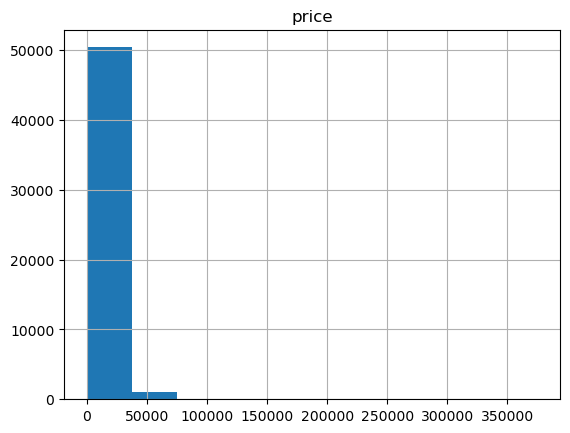

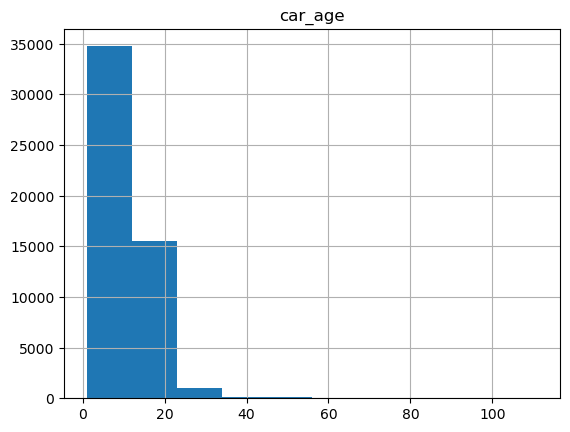

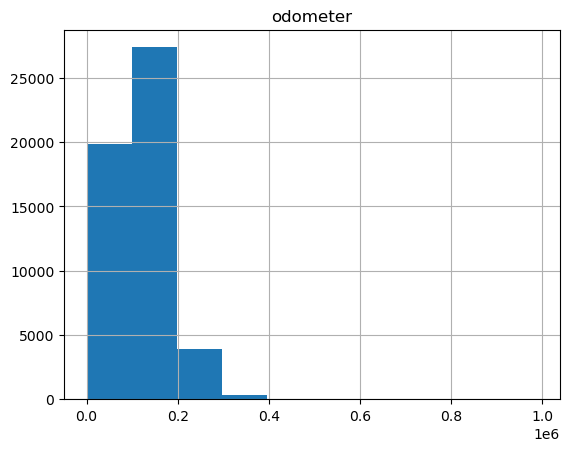

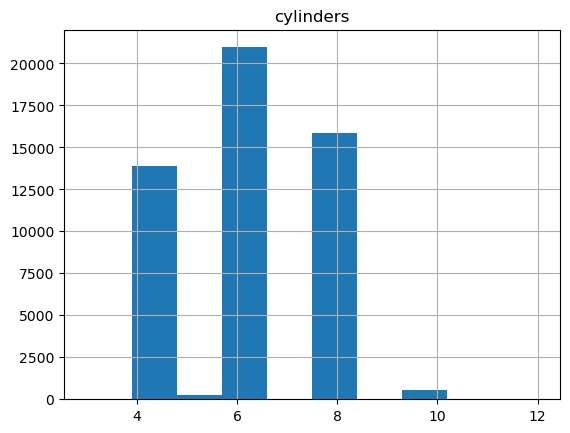

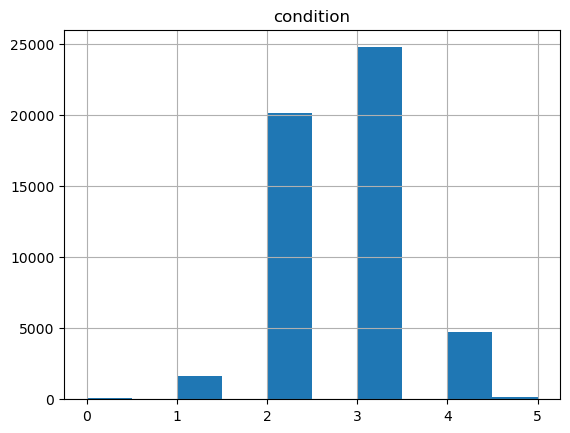

In [25]:
for col in colh:
    df.hist(column= col);
    plt.show()


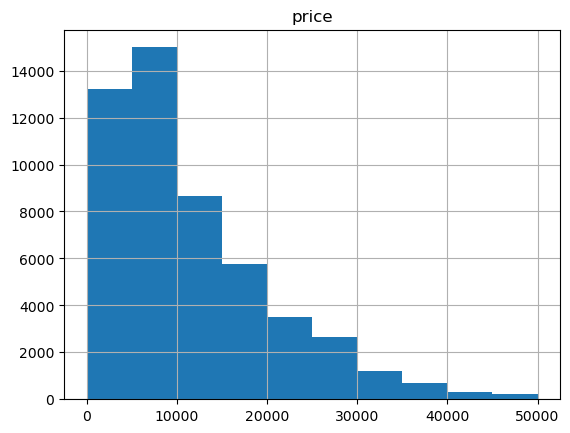

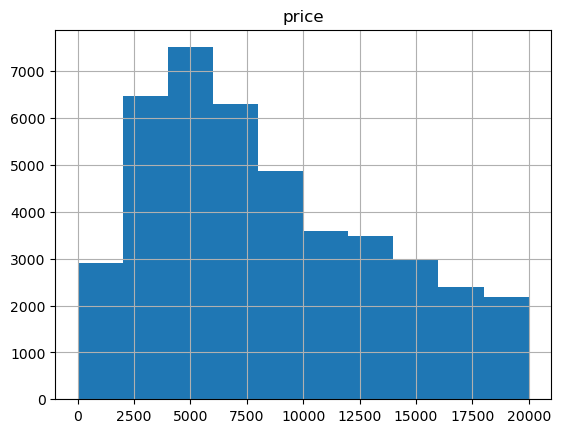

In [26]:
'''df[df['price']<100000].hist(column = 'price' );
plt.show()'''
df[df['price']<50000].hist(column = 'price' );
plt.show()
df[df['price']<20000].hist(column = 'price' );
plt.show()

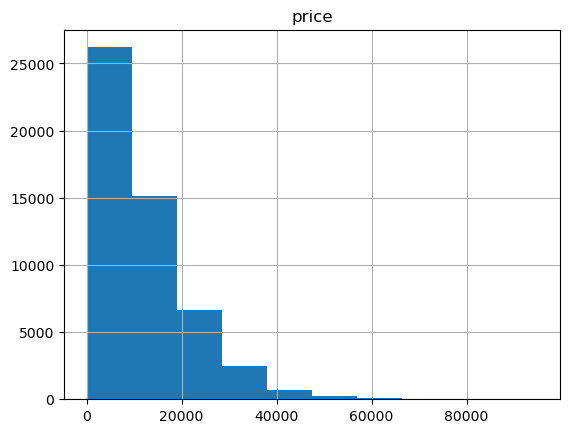

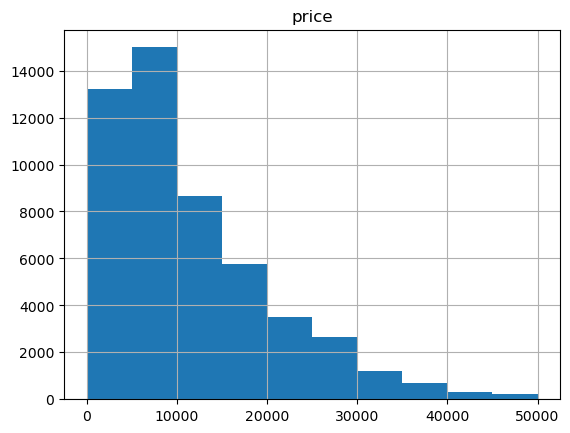

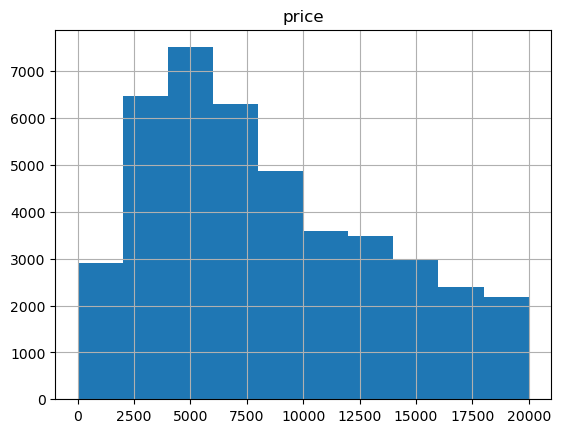

In [27]:
df[df['price']<100000].hist(column = 'price' );
plt.show()
df[df['price']<50000].hist(column = 'price' );
plt.show()
df[df['price']<20000].hist(column = 'price' );
plt.show()

cilindor e condição conportam-se como variaveis categoricas.
as outras três colunas possuem valores extremos(outliers)

## Estudando e cuidando dos valores atipicos

In [28]:
#
df[colh].describe()


,price,car_age,odometer,cylinders,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,9.436429,115182.887831,6.112450,2.637535
std,10040.803015,6.158509,62001.625382,1.573784,0.712447
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,5000.000000,5.000000,72027.000000,4.000000,2.000000
50%,9000.000000,8.000000,114000.000000,6.000000,3.000000
75%,16839.000000,13.000000,154000.000000,8.000000,3.000000
max,375000.000000,111.000000,990000.000000,12.000000,5.000000


In [29]:
#retirando outliers
def atipicos(col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    r=  q3-q1
    limitinf= q1-1.5*r
    limitinf= limitinf if limitinf >= 0 else 0.0
    limitsup = q3 + 1.5*r
    return df.loc[(df[col]>limitinf) & (df[col]<limitsup),:]

## Estudando os parâmetros fundamentais sem valores atípicos

51525
em price foram descartadas 1646 linhas
em car_age foram descartadas 887 linhas
em odometer foram descartadas 751 linhas


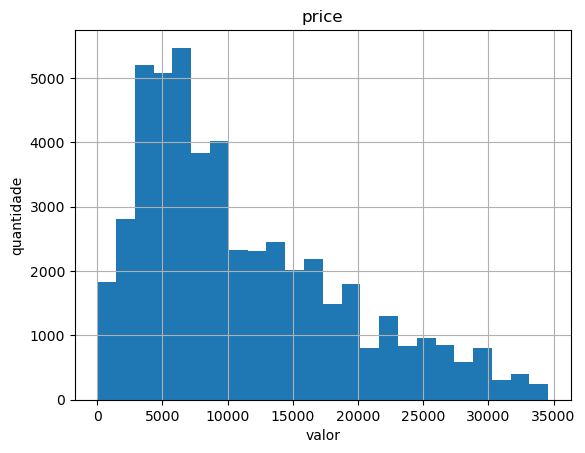

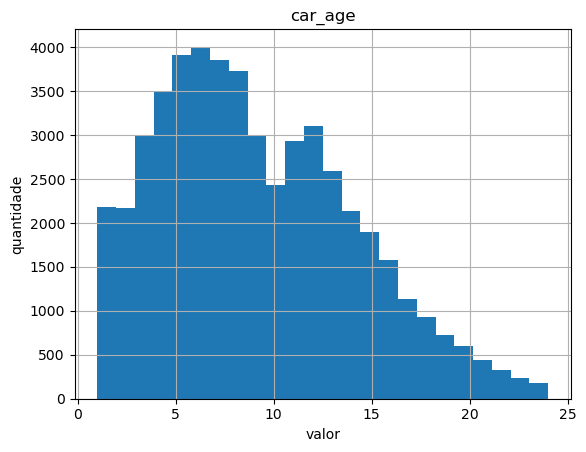

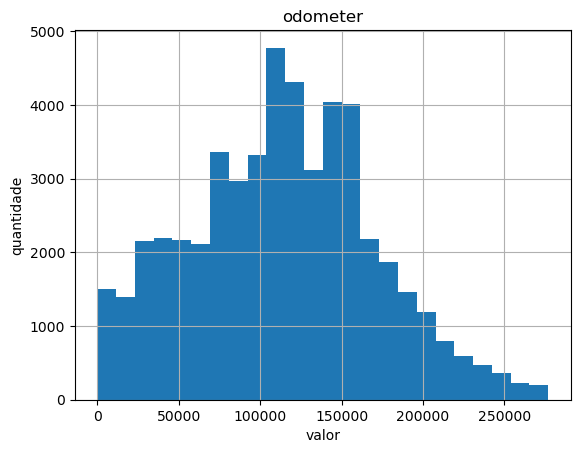

In [30]:
#aplicando a função as colunas especificas:
colh=['price',
'car_age',
'odometer',]
print(len(df))
for colu in colh:
    print("em",colu, "foram descartadas", len(df) - atipicos(colu)[colu].count(),"linhas")
    
#plotando graficos para cada coluna:
for colu in colh:
    atipicos(colu).hist(column=colu, bins = 24)
    plt.xlabel('valor')
    plt.ylabel('quantidade')
    


Text(0, 0.5, 'quantidade')

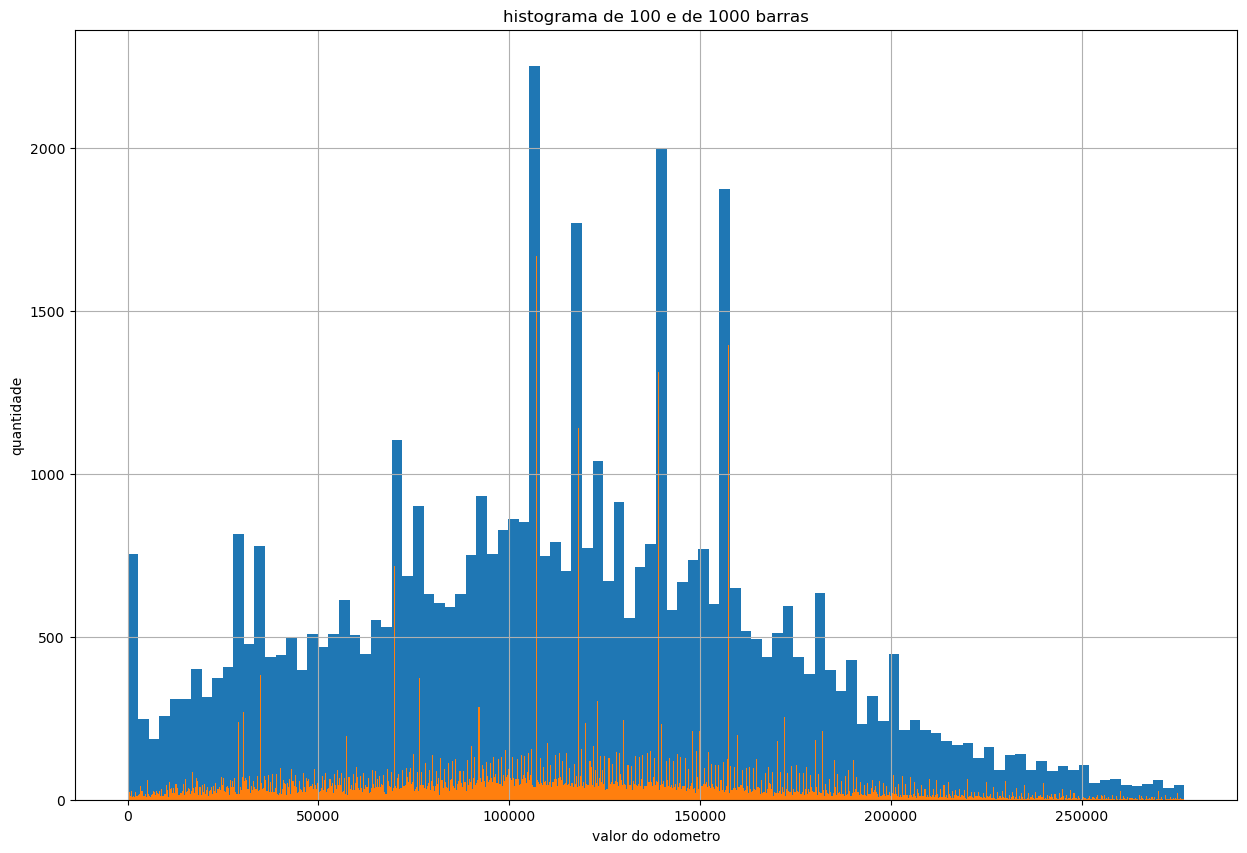

In [31]:
atipicos('odometer')['odometer'].hist(bins = 100, figsize=(15, 10)) 
atipicos('odometer')['odometer'].hist(bins = 1000, figsize=(15, 10)) 
plt.title('histograma de 100 e de 1000 barras')
plt.xlabel('valor do odometro')
plt.ylabel('quantidade')
#df['odometer'].hist(bins = 100, figsize=(15, 10)) 

In [32]:

df['odometer'].value_counts().sort_values(ascending= False)

odometer
107000.0    1616
157510.0    1369
139000.0    1274
118000.0    1106
70042.0      593
            ... 
29986.0        1
112701.0       1
261977.0       1
167153.0       1
134721.0       1
Name: count, Length: 17775, dtype: int64

observo que, em odometro, há muitos valores iguais, o que me diz que seriam valores arredondados pelos vendedores, entretanto os valores que logicamente seriam mais visados para efetuar o arredondamento não foram escolhidos pelos vendedores. 
Isso pode ocorrer em razão de o sistema adicionar algum valor ao digitado pelo usuário, ou converter a unidade de milhas para quilometros, por exemplo, ou algum outro motivo, como a opção de clicar em opções de kilometragem aproximada, no lugar de digitar manualmente.


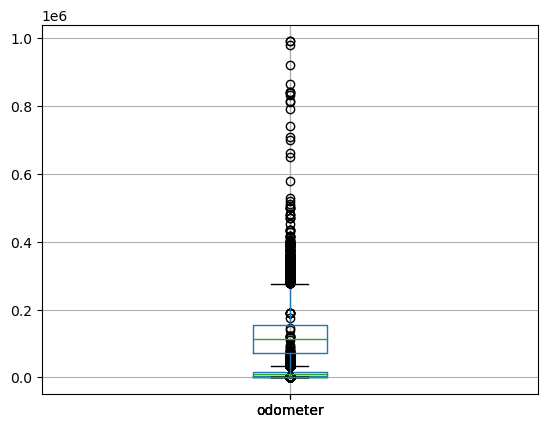

In [33]:
colh=['price',
'car_age',
'odometer',]
for col in colh:
    df.boxplot(column=col)

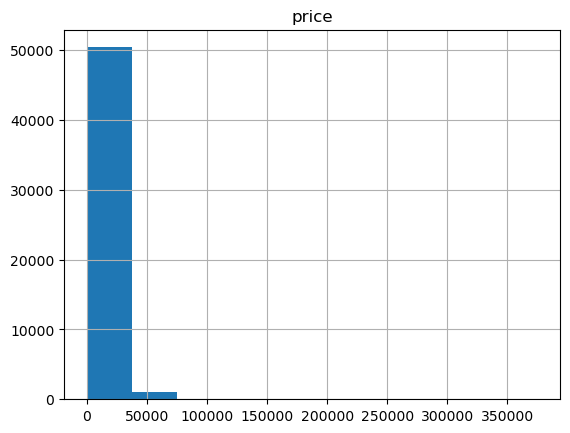

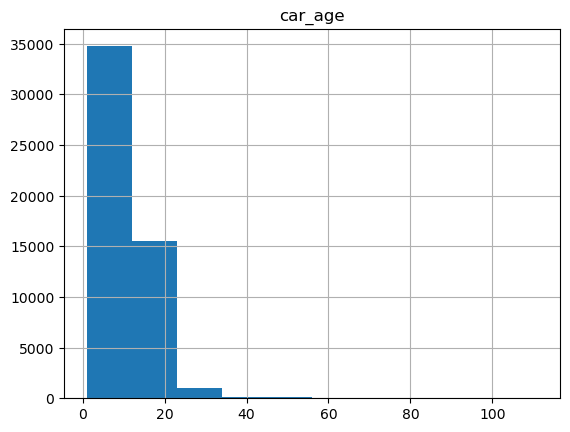

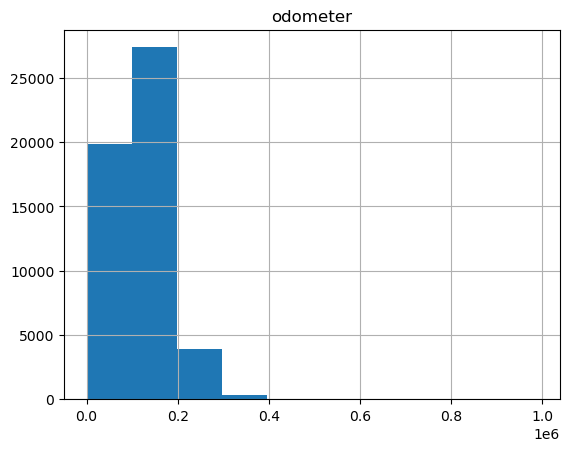

In [36]:
for col in colh:
    df.hist(column= col);
    plt.show()

concluo que os valores atipicos atrapalham a analise devendo ser descartados para melhor entendimento dos dados.
Alguns valores atipicos são muito extremos em relação aos demais.

## Tempo de vida das propagandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int32         
 13  idadec        51525 non-null  object        
 14  odo_mediana   51525 non-null  float64       
 15  day           51525 non-null  int32 

Text(0, 0.5, 'quantidade')

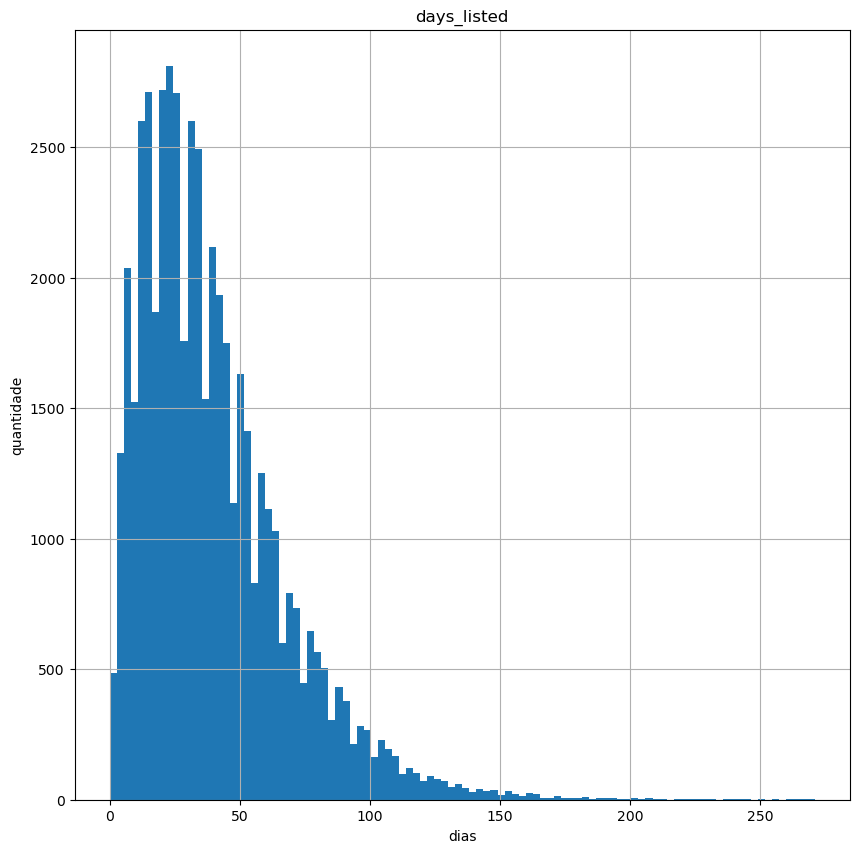

In [37]:
df['days_listed']=df['days_listed'].astype('int')

df.hist(column= 'days_listed',bins= 100, figsize= (10,10))
plt.xlabel('dias')
plt.ylabel('quantidade')

In [38]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

abaixo de 19 dias temos uma propaganda que ficou pouco tempo
acima de 53 podemos dizer que a propaganda ficou bastante tempo
a media é de aprox.39 dias, que se pode dizer que é o tempo de vida util comum da propaganda
a mediana é de 33 dias


## Média de preços por cada tipo de veículo

df11=df.groupby('type')['price'].count()
df110=df.groupby('type')['price'].mean()
df11,df110

In [71]:
dfpreçoatipico= atipicos('price')

In [72]:
dfa11=dfpreçoatipico.groupby('type').agg({'model': 'count', 'price': 'mean'}).sort_values(by= 'model', ascending= True)
dfa11

,model,price
type,,
bus,24,17135.666667
offroad,206,13177.674757
other,252,10507.194444
convertible,423,12511.617021
van,591,8743.340102
hatchback,1046,6841.620459
mini-van,1157,8004.687986
wagon,1531,8880.496408
coupe,2226,13269.010782


Text(0.5, 1.0, 'preço x tipo de veículo')

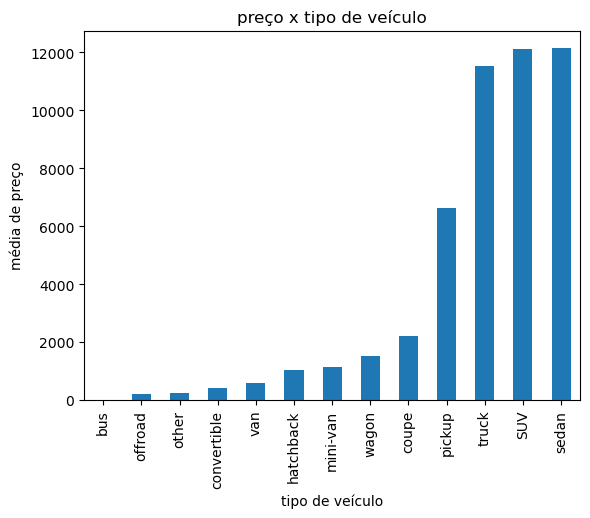

In [73]:
dfa11['model'].plot(kind='bar')
plt.xlabel('tipo de veículo')
plt.ylabel('média de preço')
plt.title('preço x tipo de veículo')


## Fatores de preço

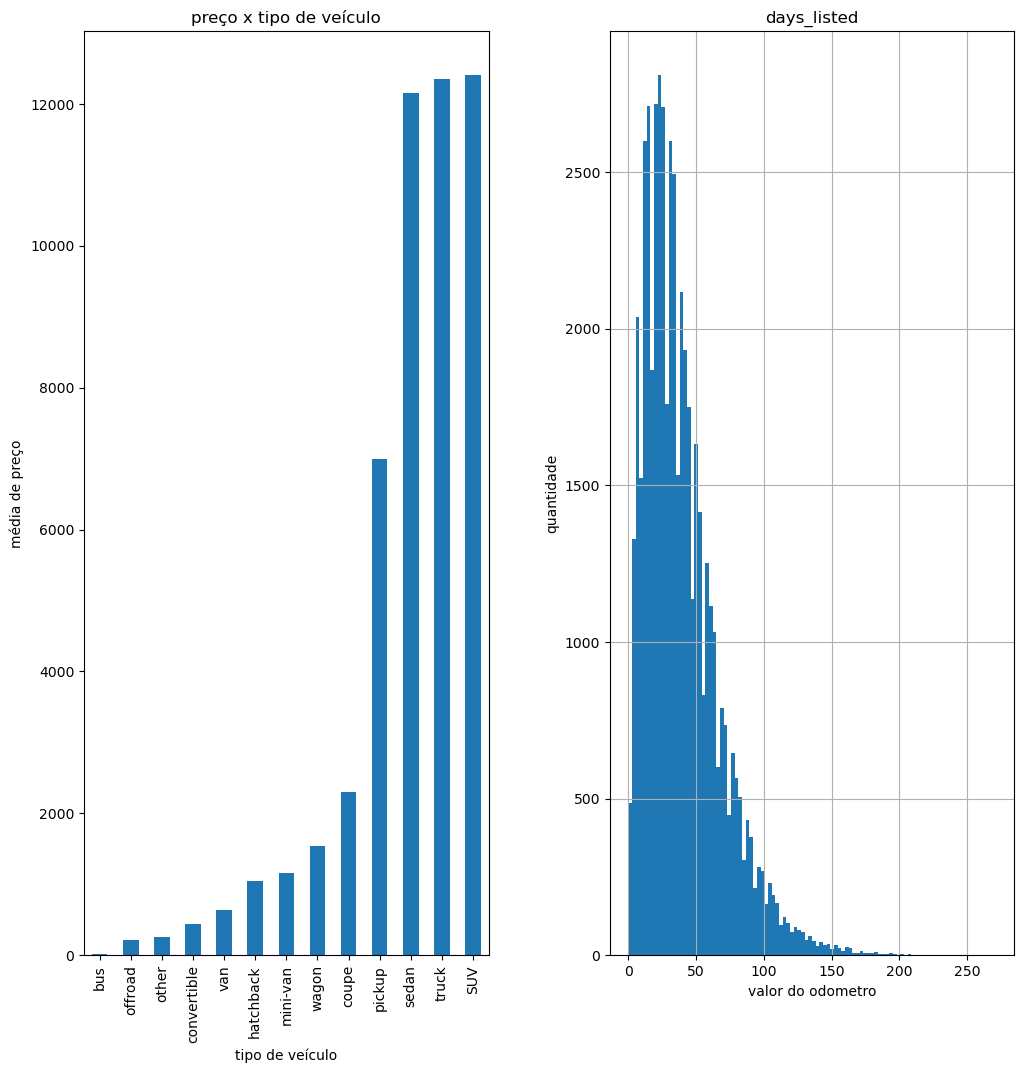

In [74]:

import matplotlib.pyplot as plt
import numpy as np

#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(1, 2, 1)
df11['model'].plot(kind='bar',figsize= (12,12))
plt.xlabel('tipo de veículo')
plt.ylabel('média de preço')
plt.title('preço x tipo de veículo')


#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

ax = plt.subplot(1, 2, 2)
plt.title("Exemplo da revisora")
df.hist(column= 'days_listed',bins= 100, figsize= (12,12),ax = ax)
plt.xlabel('valor do odometro')
plt.ylabel('quantidade')

plt.show()

In [48]:
def atipicos2(data,col):
    q1= data[col].quantile(0.25)
    q3= data[col].quantile(0.75)
    r=  q3-q1
    limitinf= q1-1.5*r
    limitinf= limitinf if limitinf >= 0 else 0.0
    limitsup = q3 + 1.5*r
    return data.loc[(data[col]>limitinf) & (data[col]<limitsup),:]

dffil=atipicos2(dfpreçoatipico, 'car_age')
dffil2=atipicos2(dffil, 'odometer')

df_Suv=dffil[dffil['type']=='SUV']
df_truck= dffil[dffil['type']=='truck']
df_sedan = dffil[dffil['type']=='sedan']

df_Suv2=dffil2[dffil2['type']=='SUV']
df_truck2= dffil2[dffil2['type']=='truck']
df_sedan2 = dffil2[dffil2['type']=='sedan']

aqui defino uma função, para identificar o intervalo de valores tipicos e excluir os atipicos.
passo a função pela coluna odometro e pela coluna car_age, para que os valores atipicos de cada coluna sejam retirados do df que iremos usar para estudar os dados com graficos.

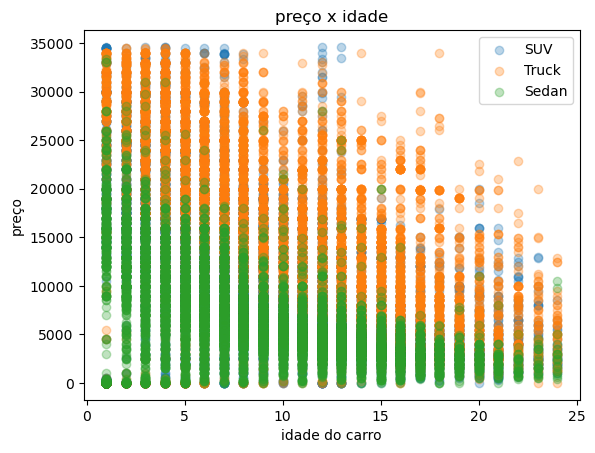

In [76]:

# Plota os dados de cada tipo de carro com uma legenda
plt.scatter(df_Suv['car_age'], df_Suv['price'], alpha=0.3, label='SUV')
plt.scatter(df_truck['car_age'], df_truck['price'], alpha=0.3, label='Truck')
plt.scatter(df_sedan['car_age'], df_sedan['price'], alpha=0.3, label='Sedan')

# Adiciona título e rótulos aos eixos
plt.title('preço x idade')
plt.xlabel('idade do carro')
plt.ylabel('preço')

# Adiciona a legenda
plt.legend()

# Exibe o gráfico
plt.show()


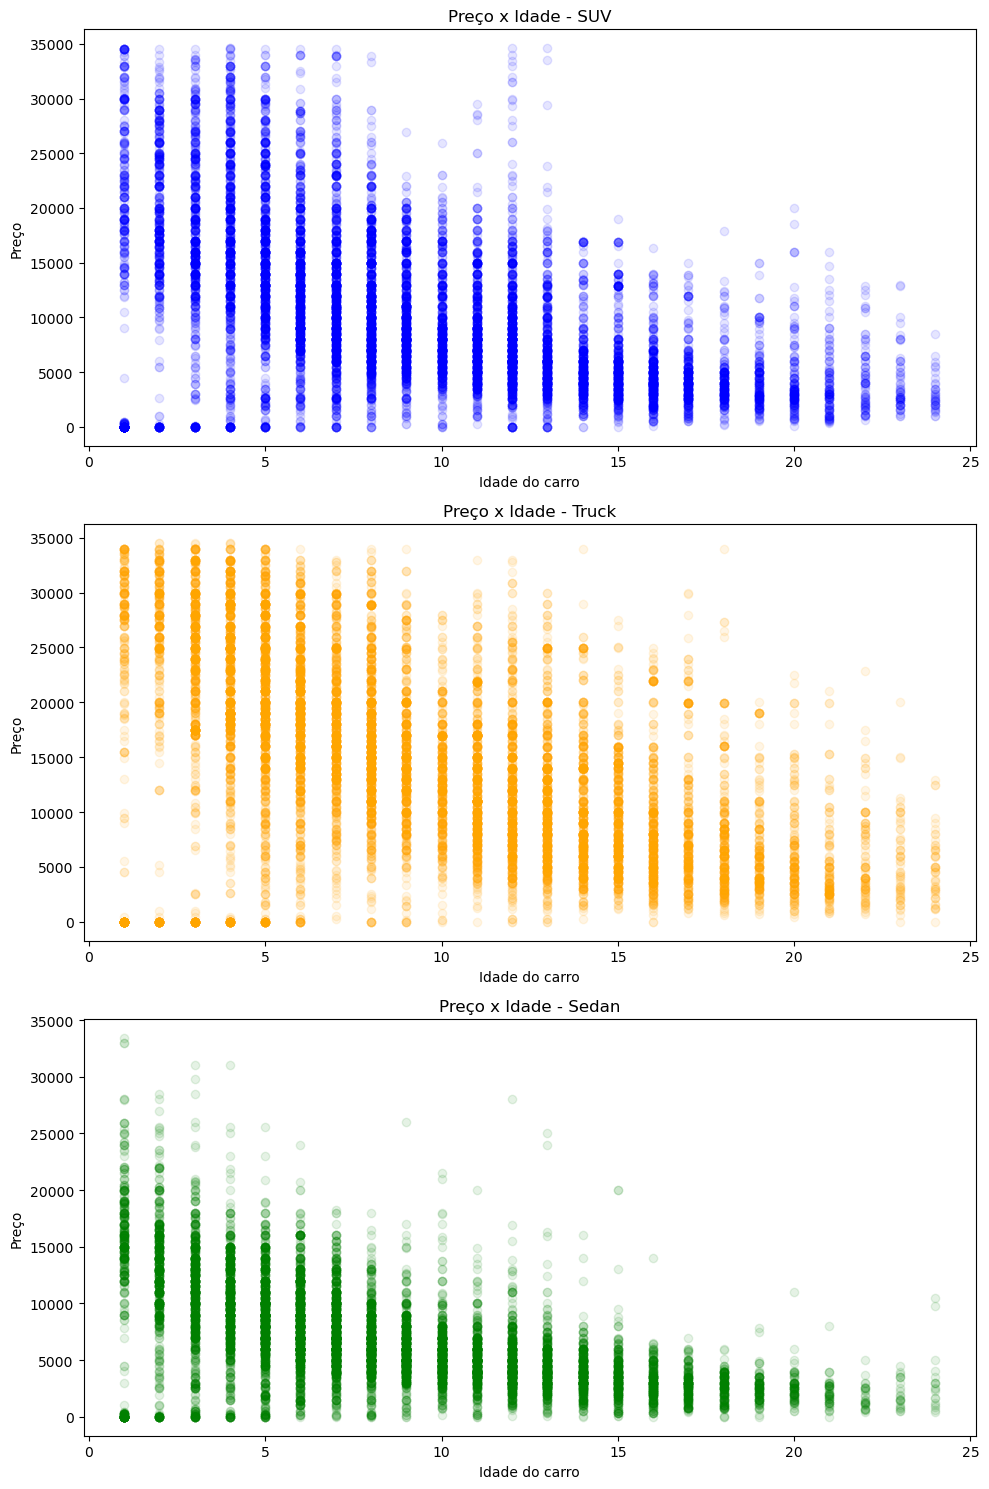

In [77]:
import matplotlib.pyplot as plt

# Cria uma figura com 3 subplots (uma coluna e três linhas)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot para SUVs
axs[0].scatter(df_Suv['car_age'], df_Suv['price'], alpha=0.1, color='blue')
axs[0].set_title('Preço x Idade - SUV')
axs[0].set_xlabel('Idade do carro')
axs[0].set_ylabel('Preço')

# Plot para Trucks
axs[1].scatter(df_truck['car_age'], df_truck['price'], alpha=0.1, color='orange')
axs[1].set_title('Preço x Idade - Truck')
axs[1].set_xlabel('Idade do carro')
axs[1].set_ylabel('Preço')

# Plot para Sedans
axs[2].scatter(df_sedan['car_age'], df_sedan['price'], alpha=0.1, color='green')
axs[2].set_title('Preço x Idade - Sedan')
axs[2].set_xlabel('Idade do carro')
axs[2].set_ylabel('Preço')

# Ajusta o layout para não sobrepor os elementos
plt.tight_layout()

# Exibe os gráficos
plt.show()


no grafico acima comparo a evolução de idadex preço para cada tipo de carro, para que se tenha uma ideia da diferença entre eles. Logo após eu exibo graficos individuais (um para cada tipo de carro). Logo dá pra perceber que o sedan desvaloriza muito mais linearmente. SUV  e truk demoram mais para desvalorizar.

Text(0, 0.5, 'preço')

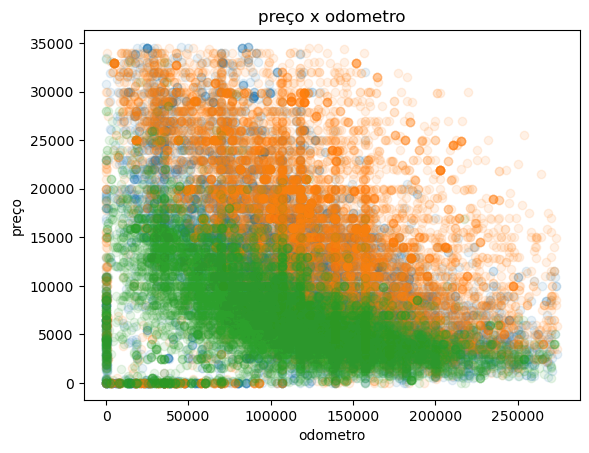

In [53]:
plt.scatter(df_Suv2['odometer'], df_Suv2['price'],alpha=0.1)
plt.scatter(df_truck2['odometer'], df_truck2['price'],alpha=0.1)
plt.scatter(df_sedan2['odometer'], df_sedan2['price'],alpha=0.1)
plt.title('preço x odometro')
plt.xlabel('odometro')
plt.ylabel('preço')

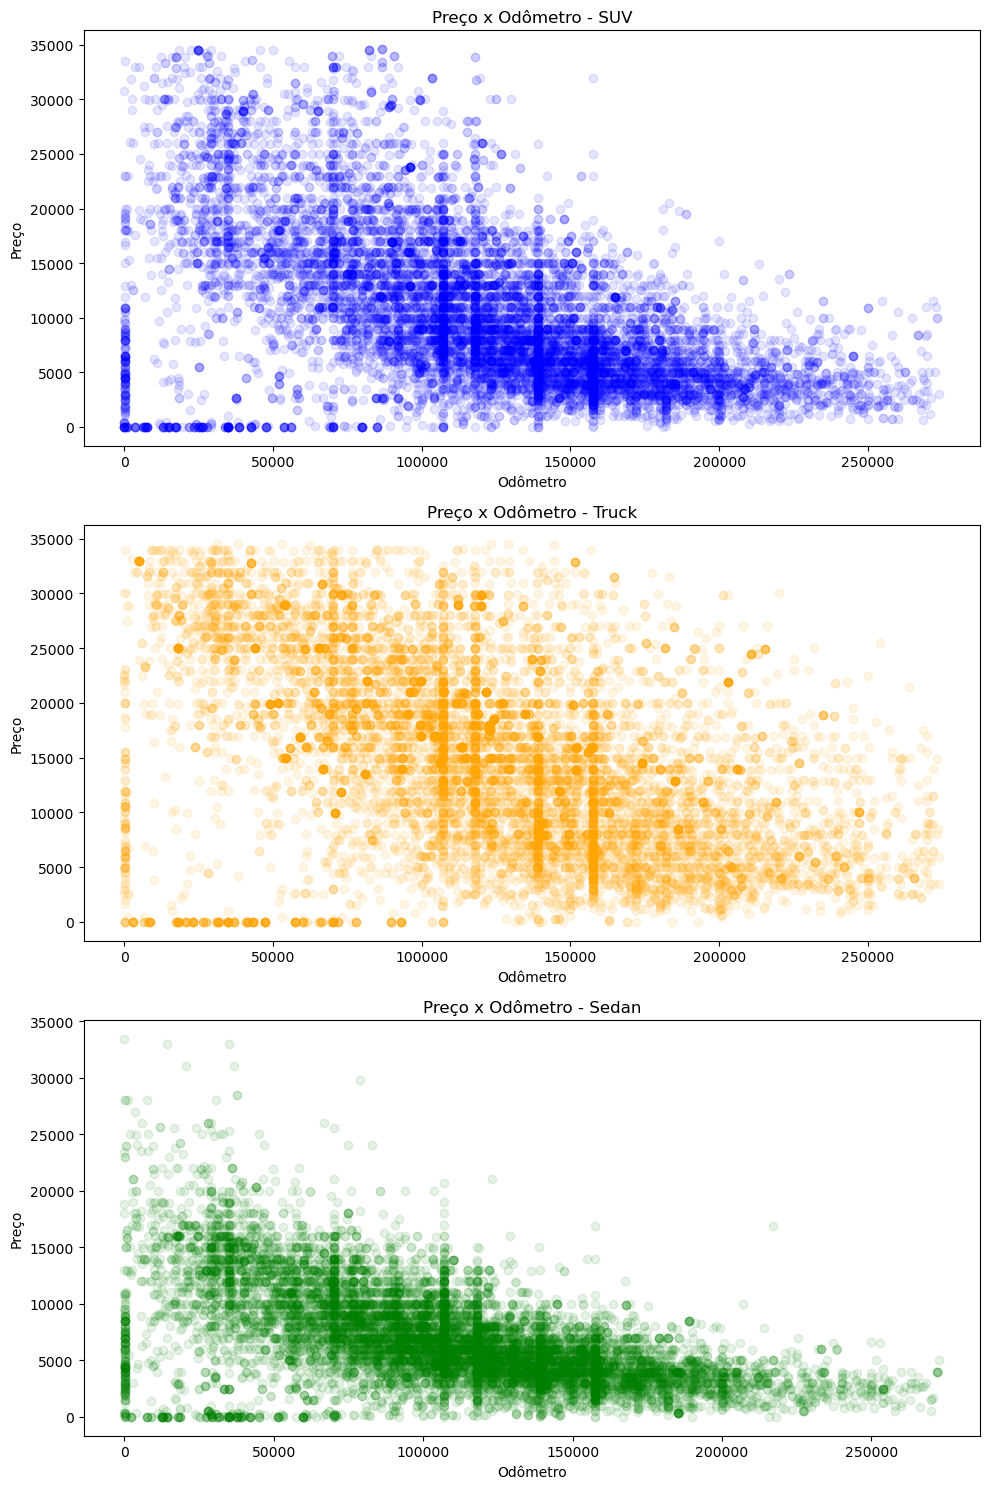

In [78]:
import matplotlib.pyplot as plt

# Cria uma figura com 3 subplots (uma coluna e três linhas)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot para SUVs
axs[0].scatter(df_Suv2['odometer'], df_Suv2['price'], alpha=0.1, color='blue')
axs[0].set_title('Preço x Odômetro - SUV')
axs[0].set_xlabel('Odômetro')
axs[0].set_ylabel('Preço')

# Plot para Trucks
axs[1].scatter(df_truck2['odometer'], df_truck2['price'], alpha=0.1, color='orange')
axs[1].set_title('Preço x Odômetro - Truck')
axs[1].set_xlabel('Odômetro')
axs[1].set_ylabel('Preço')

# Plot para Sedans
axs[2].scatter(df_sedan2['odometer'], df_sedan2['price'], alpha=0.1, color='green')
axs[2].set_title('Preço x Odômetro - Sedan')
axs[2].set_xlabel('Odômetro')
axs[2].set_ylabel('Preço')

# Ajusta o layout para não sobrepor os elementos
plt.tight_layout()

# Exibe os gráficos
plt.show()


repito o processo anterior, entretanto, desta vez, uso os valores do odometro no lugar da idade do carro. Percebo o mesmo movimento, com os sedans se desvalorizando mais e mais rápido.

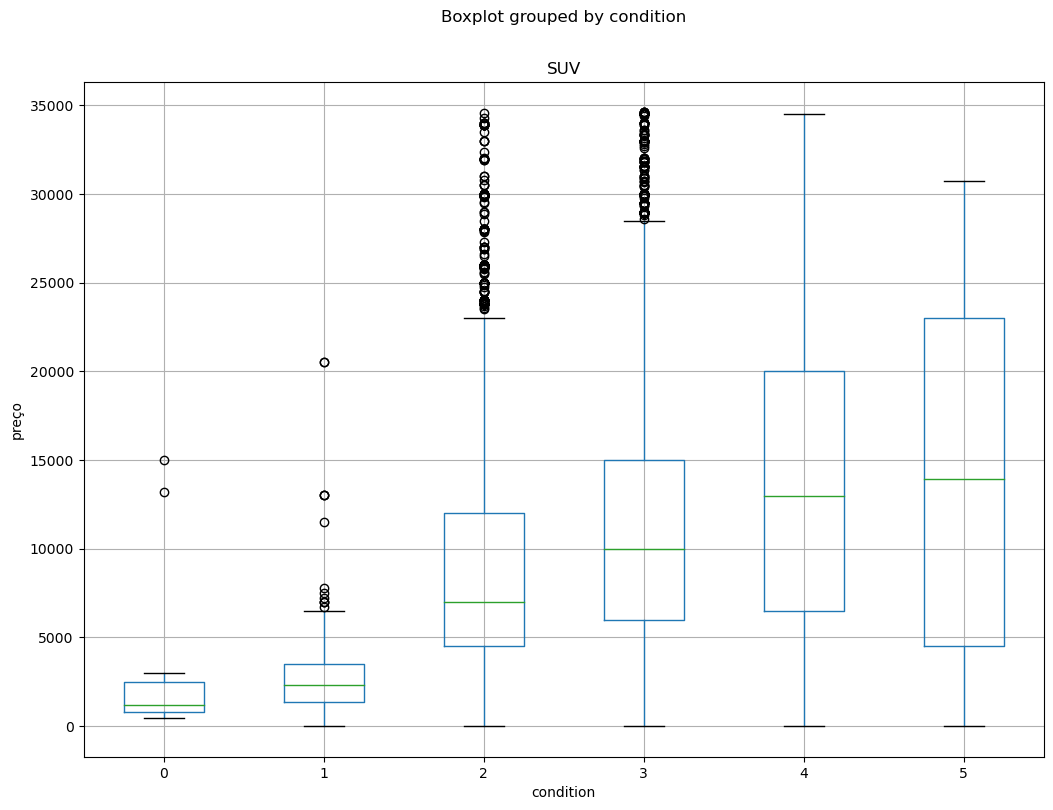

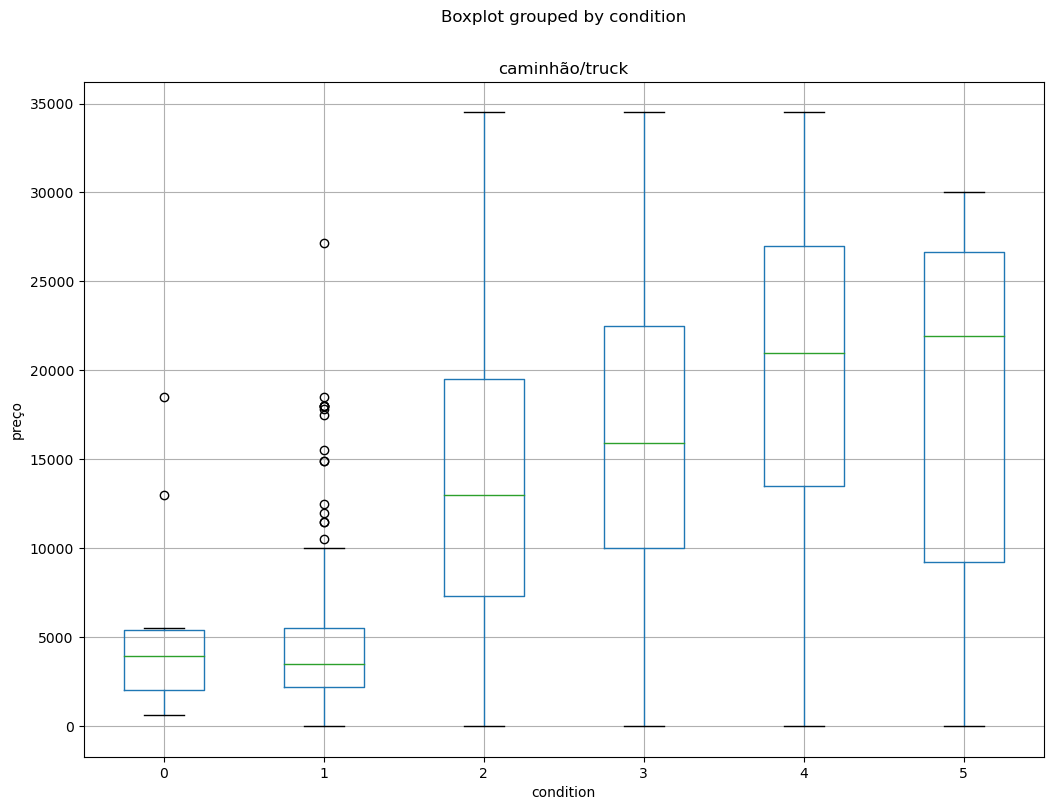

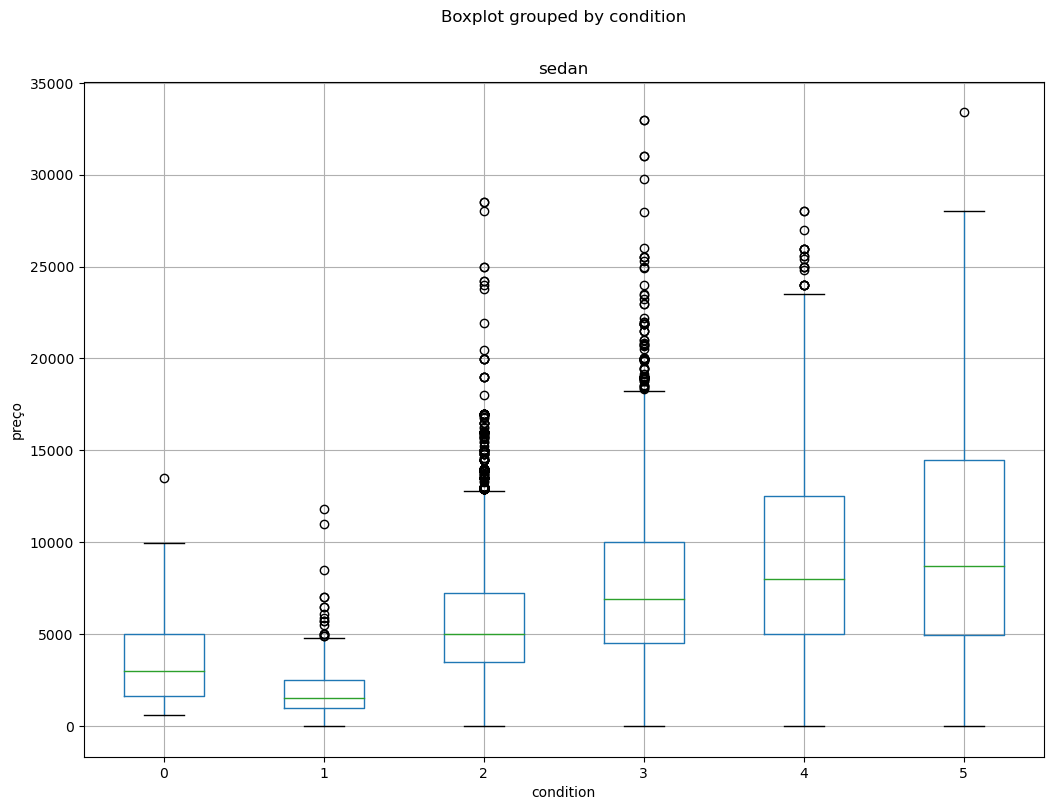

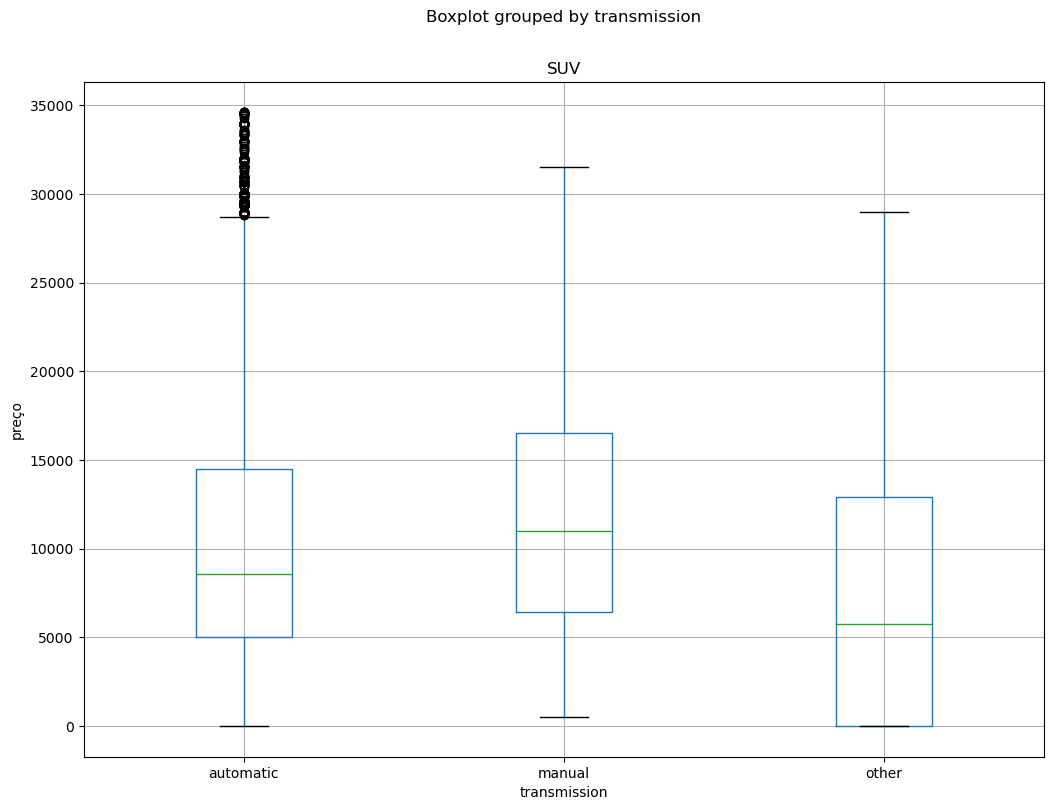

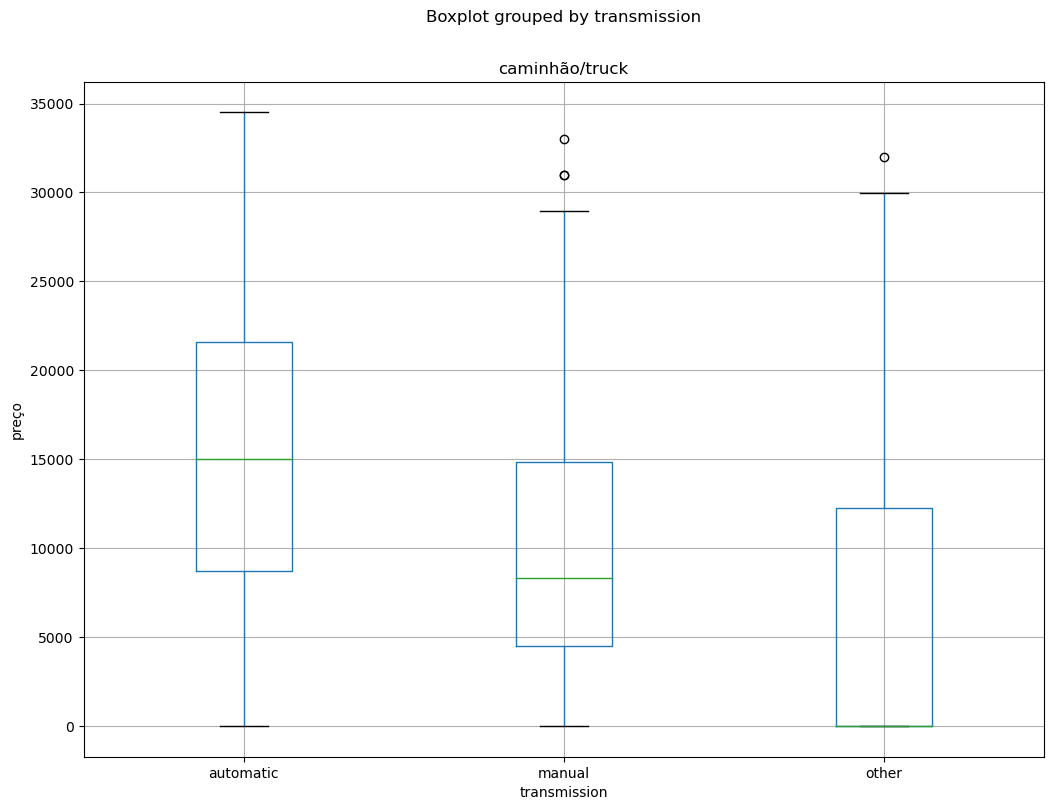

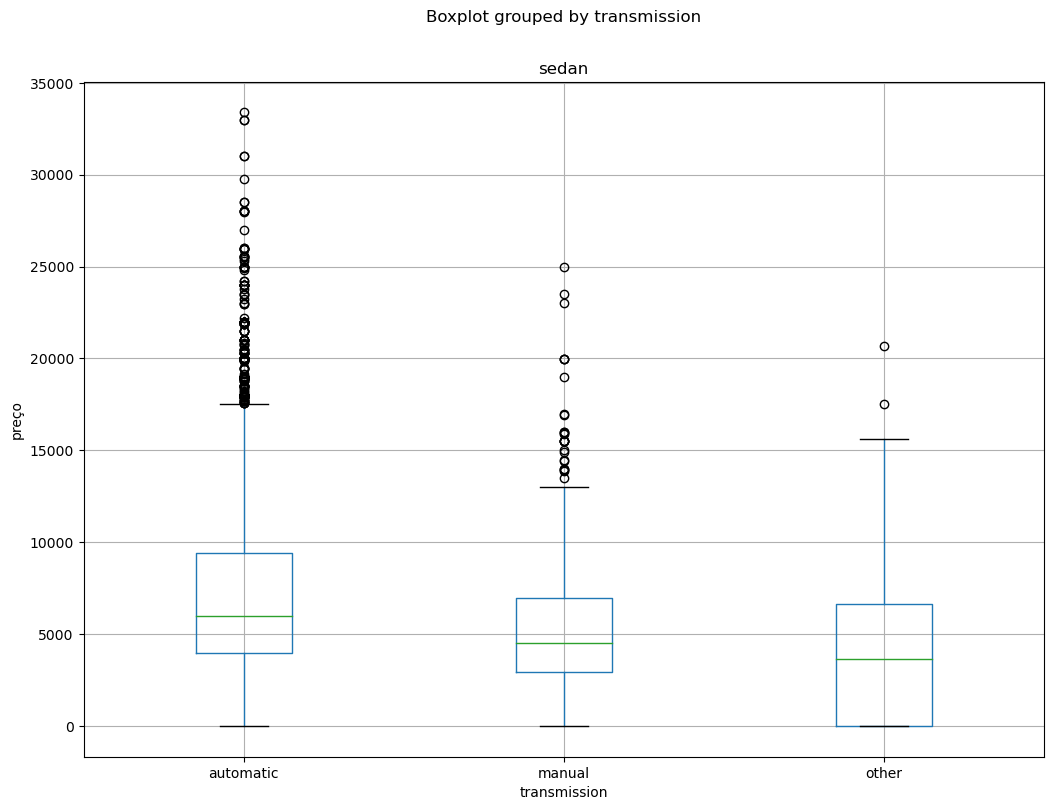

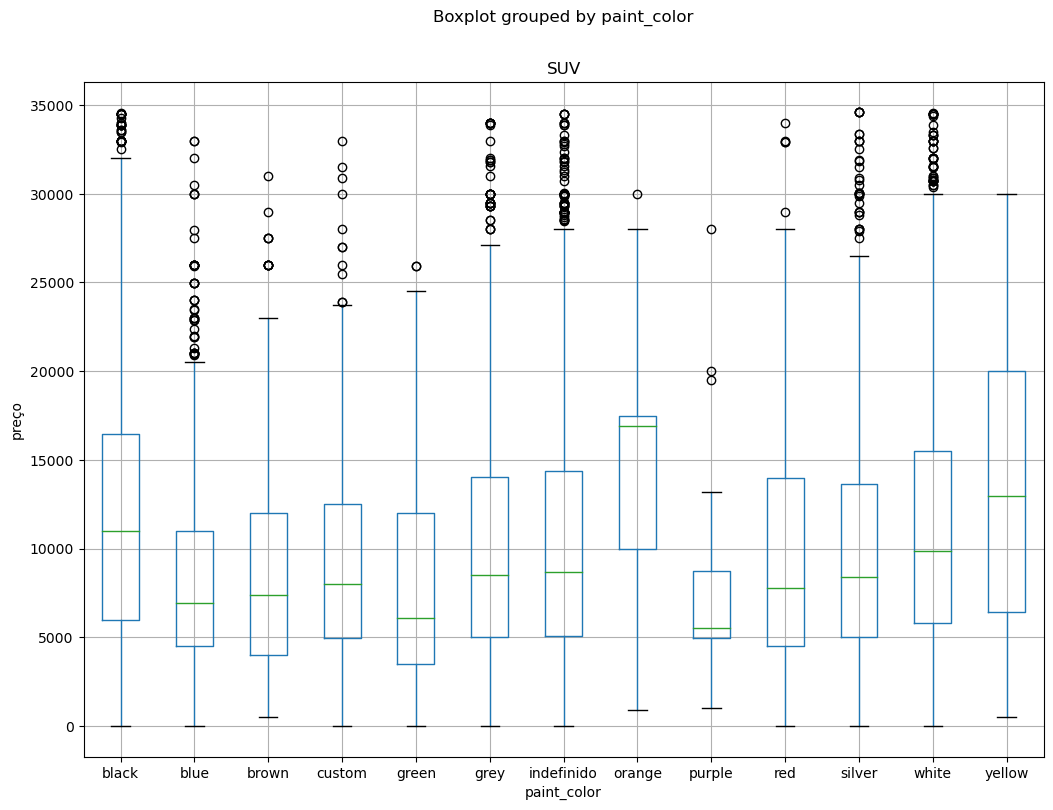

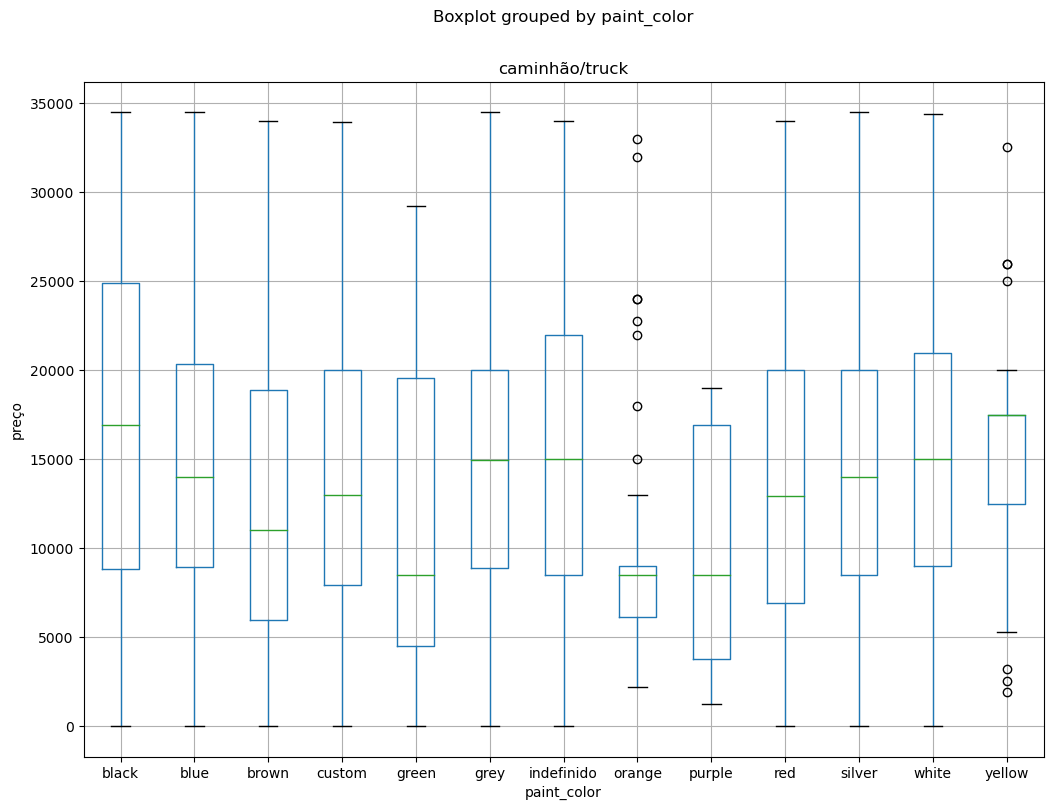

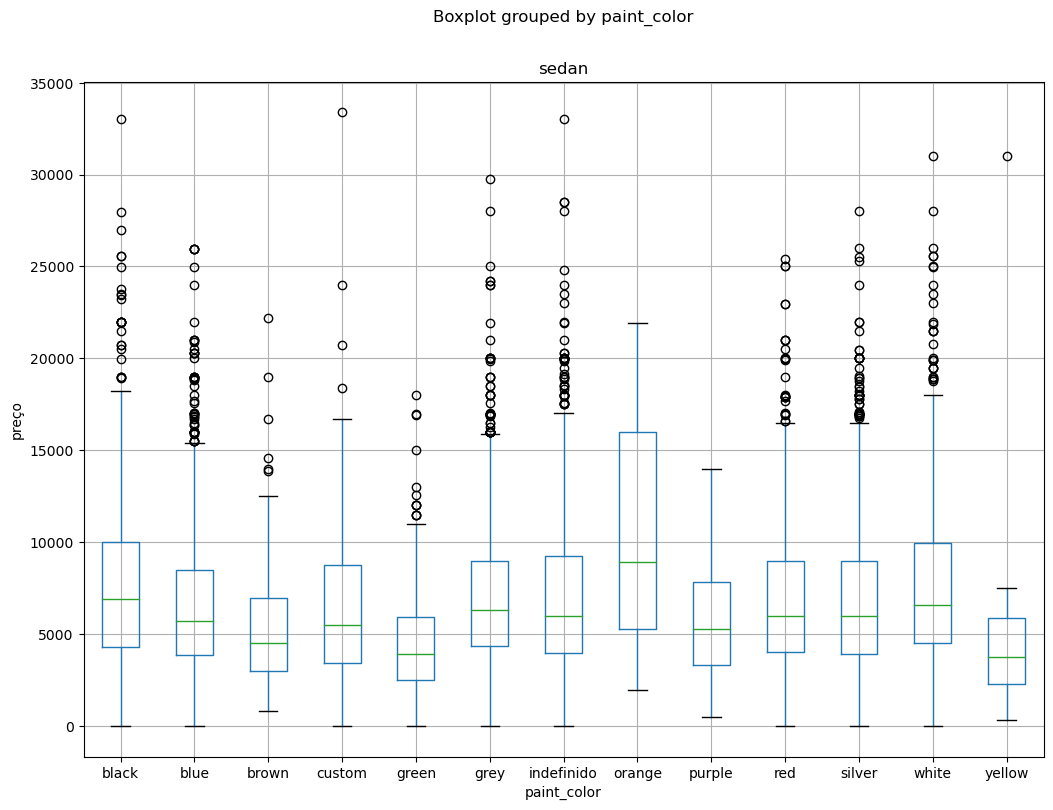

In [80]:
fig, ax = plt.subplots(figsize=(12, 9))
df_Suv2.boxplot(column='price', by='condition', ax=ax)
plt.title('SUV')
plt.ylabel('preço')
plt.show()

fig, ax = plt.subplots(figsize=(12, 9))
df_truck2.boxplot(column='price', by='condition', ax=ax)
plt.title('caminhão/truck')
plt.ylabel('preço')
plt.show()

fig, ax = plt.subplots(figsize=(12, 9))
df_sedan2.boxplot(column='price', by='condition', ax=ax)
plt.title('sedan')
plt.ylabel('preço')
plt.show()



fig, ax = plt.subplots(figsize=(12, 9))
df_Suv2.boxplot(column='price', by='transmission', ax=ax)
plt.title('SUV')
plt.ylabel('preço')
plt.show()

fig, ax = plt.subplots(figsize=(12, 9))
df_truck2.boxplot(column='price', by='transmission', ax=ax)
plt.title('caminhão/truck')
plt.ylabel('preço')
plt.show()


fig, ax = plt.subplots(figsize=(12, 9))
df_sedan2.boxplot(column='price', by='transmission', ax=ax)
plt.title('sedan')
plt.ylabel('preço')
plt.show()




fig, ax = plt.subplots(figsize=(12, 9))
df_Suv2.boxplot(column='price', by='paint_color', ax=ax)
plt.title('SUV')
plt.ylabel('preço')
plt.show()


fig, ax = plt.subplots(figsize=(12, 9))
df_truck2.boxplot(column='price', by='paint_color', ax=ax)
plt.title('caminhão/truck')
plt.ylabel('preço')
plt.show()


fig, ax = plt.subplots(figsize=(12, 9))
df_sedan2.boxplot(column='price', by='paint_color', ax=ax)
plt.title('sedan')
plt.ylabel('preço')
plt.show()

In [82]:
print('.....tudo......')
print(dffil2['paint_color'].value_counts())
print('.....sedan......')
print(df_sedan2['paint_color'].value_counts())
print('.....truck......')
print(df_truck2['paint_color'].value_counts())
print('.....Suv......')
print(df_Suv2['paint_color'].value_counts())


.....tudo......
paint_color
white         9198
indefinido    8693
black         7173
silver        6032
grey          4810
blue          4228
red           4079
green         1309
brown         1135
custom        1093
yellow         224
orange         213
purple          91
Name: count, dtype: int64
.....sedan......
paint_color
indefinido    2157
silver        2031
black         1748
grey          1610
white         1484
blue          1211
red            928
custom         293
brown          254
green          203
purple          24
yellow          21
orange           9
Name: count, dtype: int64
.....truck......
paint_color
white         3329
indefinido    1921
black         1395
red            947
silver         929
grey           849
blue           818
custom         299
green          258
brown          227
yellow          65
orange          45
purple          13
Name: count, dtype: int64
.....Suv......
paint_color
indefinido    2141
black         2095
white         1870
silver     

Fiz graficos de caixa para cada tipo de veículo(sedan SUV e truck) nas colunas condição, tipo de transmissão, cor do carro.  para confirmar algumas teorias obvias, outras nem tanto.   
Comandei para o sistema mostrar a quantidade de anúncios por cores e por tipo de veículo, para que amostras muito pequenas não fossem levadas em conta nas conclusões sobre o gráfico.  
concluí que  cores como roxo, laranja e amarelo são muito raras e não foram levadas em conta. Preto e branco e cinza são bem comuns e até valorizadas na hora da venda.  
Sobre condição do carro, obvio que quanto melhor a condição, maior o preço, sendo que o preço dos sedans o que menos sofre em relação a variação de condição do veículo.  
Quanto à transmissão, a surpresa fica por conta dos SUVs, cuja transmissão manual pegou uma media de preços maior que a automática.  

In [68]:
dfmap=dffil2.drop(['type','transmission','fuel','model','idadec','paint_color','is_4wd','date_posted','weekday','year','month','day','model_year','days_listed','odo_mediana'], axis=1)
dfmap

,price,condition,cylinders,odometer,car_age,km/year
0,9400,2,6,145000.0,8,18125.00
1,3200,3,6,139000.0,16,8687.50
2,8499,2,6,104482.0,11,9498.36
3,22914,3,6,69686.0,4,17421.50
4,22914,3,6,69686.0,4,17421.50
...,...,...,...,...,...,...
51520,3995,2,6,134721.0,13,10363.15
51521,5500,2,6,128945.0,10,12894.50
51522,9988,2,6,84841.0,9,9426.78
51523,6999,3,6,120197.0,11,10927.00


In [67]:
import seaborn as sns

<Axes: >

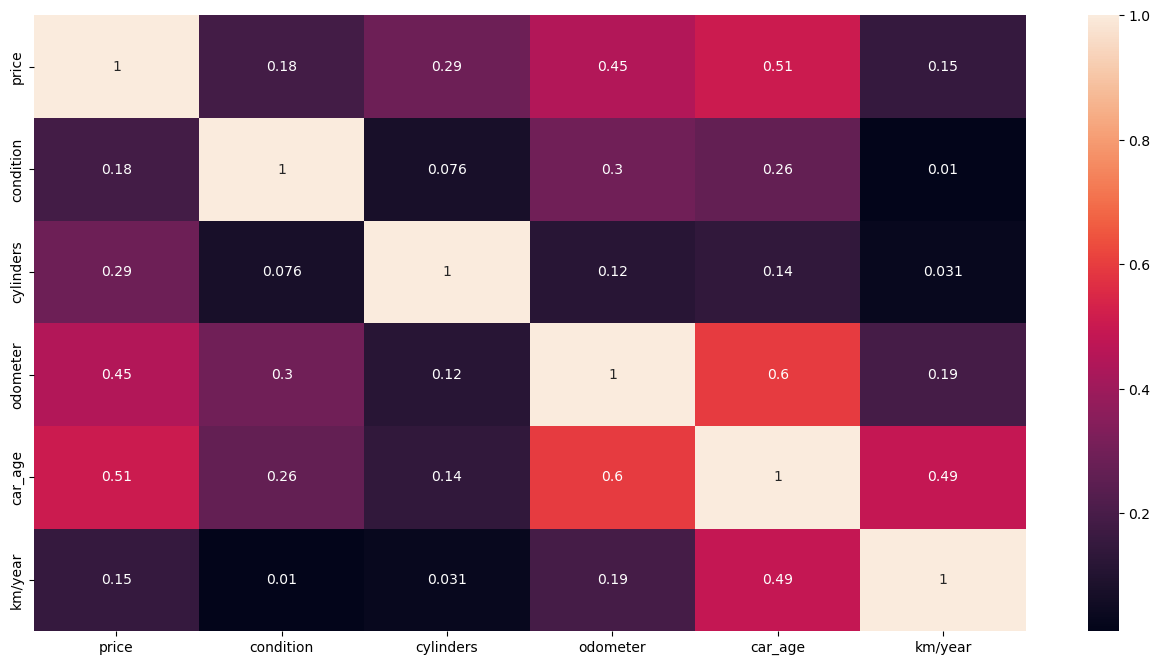

In [70]:
plt.figure(figsize=(16, 8))
sns.heatmap(dfmap.corr().abs(),annot=True)

aqui, fiz um mapa de cores(temperatura) para entender melhor as correlações lineares entre os valores das colunas do dataframe.
Diante disto e dos demais estudos anteriores, pude tomar as seguintes conclusões:

## Conclusão geral

As relações mais fortes de influencia no preço são o ano de fabricação do carro(model_year), contagem do odometro(odometer) e idade do carro(car_age). outros fatores como quantidade de cilindros e tração influem muito sensivelmente, enquanto que a condição do carro quase não tem correlação linear com o preço, mas no grafico de caixas fica claro que há sim significativa relação(o que é curioso, pois esperava-se maior relação).

O preço dos caminhões é bem menos afetado pelo registro do odometro e pela idade do veículo, que SUV e sedan. 
O que talvez se justifique em razão de sua durabilidade maior e de sua particular funcionalidade laboral, em contraste com a função dos veículos SUV e sedan, cuja procura se dá, provavelmente muito mais em razão de sua função de transporte individual e sua função de incrementar o status social do dono.

Quanto à cor, percebe-se que as pessoas anunciam mais carros da cor branca, depois preta e prateada.Entretanto, muitos não definiram a cor(talvez em razão de anunciarem junto com a foto do carro e acharem que a informação seria redundante, ou mesmo por acharem irrelevante). Na hora da venda (deixando de lado amostragens muito pequenas) a cor preta parece ser um pouco mais cara que as demais, tanto para SUV, como sedan e caminhão. Já as cores verde e marron são mais baratas na hora da venda(talvez pela baixa procura), com exceção dos carros tipo USV, para os quais o azul e vermelho são ainda mais desvalorizados(talvez por serem chamativos demais para o publico que carros tipo SUV atendem). 

Em relação ao tempo da propaganda, temos que se a quantidade de dias que ficou no ar for: abaixo de 19 dias considera-se que propaganda que ficou pouco tempo, acima de 53 podemos dizer que a propaganda ficou bastante tempo.
a media é de aprox.39 dias, que se pode dizer que é o tempo de vida util comum da propaganda, já a mediana é de 33 dias.
Diante disto, o setor de publicidade pode usar desses dados para elaborar formas de promoções, ofertas, ou semelhantes estrategias para conseguir mais e melhores clientes. Assim como o setor de aperfeiçoamento pode rever a forma que a propaganda é mostrada, no decorrer dos dias.

Notei também que neste site os preços são em geral abaixo de 15.000,00 de quantia que suponho corresponda à dolares, além disso, muitos carros são vendidos com preços de aproximadamente 5.000.
os dados são de propagandas de 2018 e 2019, portanto o site deve ter começado a coletar essas informações em 2018 apenas.
Em razão de haver muitas propagandas, acaba-se encontrando alguns valores muito atipicos em relação ao conjunto.
Temos alguns carros sendo vendidos por preços excessivamente baixos, o que não precisa significar erro algum, pois podemos considerar que algusn desses carros requerem gastos para que sejam uteis aos novos donos, como por exemplo, os que necessitam de conserto, de pagamento de multas, de reboque, etc.

Por fim e com menos importancia, quanto ao preenchimento dos valores, observo que, em odometro, há muitos valores iguais, o que me diz que seriam valores arredondados pelos vendedores, entretanto os valores que logicamente seriam mais visados para efetuar o arredondamento(100.000; 200.000; 50.000...) não foram escolhidos pelos vendedores, a moda é o número 107.000. Isso pode ocorrer em razão de o sistema adicionar algum valor ao digitado pelo usuário, ou converter a unidade de milhas para quilometros, por exemplo, ou algum outro motivo, como a opção de clicar em opções de kilometragem aproximada, no lugar de digitar manualmente. Já o preço, identifico valores proximos de numeros arredondados como 6995,00; 5995,00; 4995,00 reais, ou 1 real. O que significa que para ficar abaixo de um determinado valor(para aparecer em certos filtros dos possiveis compradores) as pessoas abaixam em 5 reais o valor que querem.

